# NN 時間！ 玩玩 MNIST

## 初始準備

Keras可以用各種不同的深度學習套件當底層，這邊我們用tensorflow

In [1]:
%env KERAS_BACKEND = tensorflow

## 數據分析三兄弟

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 由 Keras 讀入 MNIST 

In [3]:
from keras.datasets import mnist

Using TensorFlow backend.


In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
len(x_train)

60000

### 看看形狀 (28 x 28 的矩陣)

In [6]:
x_train[9487].shape

(28, 28)

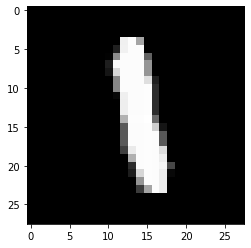

In [7]:
plt.imshow(x_train[9487], cmap='gray')

In [8]:
# 看看答案是不是 1
y_train[9487]

1

## 輸入格式整理

每筆手寫數據都是 28x28，可惜標準神經網路只吃平平的向量，所以需要reshape壓平。

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

## 輸出格式整理

進行一個 one-hot encoding 的動作

In [11]:
from keras.utils import np_utils

In [12]:
# 分 0~9 ，共 10 類
y_train = np_utils.to_categorical(y_train, 10)

In [13]:
y_test = np_utils.to_categorical(y_test, 10)

#### 看看現在9487號的答案

In [15]:
# 沒錯，分在第 1 類
y_train[9487]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# 開始打造神經網路

## 決定架構

假設：
* 使用兩個 hidden layers
* 每個 hidden layer 用 500 個神經元
* Activation Function 唯一指名 sigmoid

### 讀入套件吧

In [16]:
# SGD -> 標準梯度下降(隨機取)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

### 開個函數學習機

In [20]:
model = Sequential()

In [21]:
# model.add(你要新增的層)
# 第一次新增隱藏層需要提示 input_dim=輸入的維度
model.add(Dense(500, input_dim=784))
model.add(Activation('sigmoid'))

In [23]:
# 第二層
model.add(Dense(500))
model.add(Activation('sigmoid'))

In [24]:
# 輸出層
# 我們希望所有輸出值的合為 1，所以用 softmax 當激勵函數
model.add(Dense(10))
model.add(Activation('softmax'))

# 組裝你的神經網路

In [29]:
# loss->loss function, optimizer->學習法, lr->learning rate(每次往斜率負方向移動的距離)
model.compile(loss='mse', optimizer=SGD(lr=0.1),
             metrics=['accuracy'])

### 查看神經網路的結構

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_3 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_5 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_5 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5010      
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
Total para

In [32]:
# 392500
# 784維 與 500神經元相連，加上 500 bias (500神經元就有 500 bias)
784*500 + 500

392500

In [33]:
# 250500

500*500 + 500

250500

In [36]:
# 5010

500*10 + 10

5010

# 訓練你的神經網路

In [37]:
model.fit(x_train, y_train, batch_size=100, epochs=20)




Epoch 1/20





60000/60000 [==============================] - 11s 176us/step - loss: 0.0796 - acc: 0.3803
Epoch 2/20
60000/60000 [==============================] - 9s 156us/step - loss: 0.0503 - acc: 0.7163 1s - los - ETA: 0s - loss: 0.0508 - acc
Epoch 3/20
60000/60000 [==============================] - 15s 256us/step - loss: 0.0310 - acc: 0.8375
Epoch 4/20
60000/60000 [==============================] - 14s 237us/step - loss: 0.0221 - acc: 0.8810
Epoch 5/20
60000/60000 [==============================] - 15s 246us/step - loss: 0.0180 - acc: 0.8976
Epoch 6/20
60000/60000 [==============================] - 12s 196us/step - loss: 0.0156 - acc: 0.9086
Epoch 7/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.0140 - acc: 0.9163
Epoch 8/20
60000/60000 [==============================] - 7s 117us/step - loss: 0.0129 - acc: 0.9232
Epoch 9/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.0119 - acc: 0.9289
Epoch 10/20
60000/60000 [=============

In [44]:
from ipywidgets import interact

In [40]:
# predict 放的是神經網路的學習結果。這裡用 predict_classes 會讓 Keras 選 10個輸出機率最大的那類
predict = model.predict_classes(x_test)

In [41]:
def test(測試編號):
    plt.imshow(x_test[測試編號].reshape(28, 28), cmap='gray')
    print('神經網路判斷為：', predict[測試編號])

In [45]:
interact(test, 測試編號 = (0, 9999));

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Output()), _dom_classes=('widget-in…

# 訓練好的神經網路存起來

In [49]:
model_json = model.to_json()
open('mnist_model_architecture.json', 'w').write(model_json)
model.save_weights('mnist_model_weights.h5')